# RamDAQ QC report (SE)

## 1. Preparation (Just ignore this section!)
In this section, we prepare for visualization of QC results.

### Directory setting

In [1]:
### working Dir (QCdata parent dir : "output_" + Project_id)
workdir = "/data"

### RamDA-QC-pipeline Dir
scriptdir = "/accessory/"

In [2]:
setwd(workdir)
getwd()

source(paste0(scriptdir, "/00_sampleQC_function_nbconvert.R"))
outdir = ""

[1] "/data"


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths


Attaching package: ‘matrixStats’

The following object is masked from ‘package:dplyr’:

    count

The following object is masked from ‘package:plyr’:

    count

Loading required package: limma

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
***************************************************

### Loading 'sample blacklist' (list of samples (cells) to be excluded from QC)

If the 'sample blacklist' is provided, samples (cells) in the list are excluded from QC results.

In [3]:
exclude_samplelist_path = paste0(workdir, "/exclude_samplelist.txt")

if (file.exists(exclude_samplelist_path)){
  exclude_samplename = scan(exclude_samplelist_path, what=character(), sep="\n", blank.lines.skip = F)
  exclude_samplename = exclude_samplename[exclude_samplename != ""]
  exclude_samplename
} else {
  cat("exclude samplelist not found.")
  exclude_samplename = ""
}

exclude samplelist not found.

### Loading QC result files

#### FastQC results

In [4]:
fastqc_SE_001 = read.table(paste0(workdir, "/summary_fastQC_result.txt"), sep="\t", comment.char = "", header=T, stringsAsFactors=F)

### edit data table
fastqc_SE_001 = trim_dataset(fastqc_SE_001)
head(fastqc_SE_001)

name,totalseq,perGC
<chr>,<int>,<int>
SRR8452815_1,2354668,45
SRR8452791_1,1864614,46
SRR8452801_1,2165296,46
SRR8452785_1,2131909,45
SRR8452732_1,1796337,44
SRR8452747_1,1983681,45


#### RSeQC results
##### >> readDistribution

In [5]:
### unstranded
readDist_SE_001 = read.table(paste0(workdir, "/summary_RSeQC_ReadDist_results_SE_sort.txt"), sep="\t", comment.char = "", header=T, stringsAsFactors=F)

### edit data table
readDist_SE_001 = trim_dataset(readDist_SE_001)
head(readDist_SE_001)

name,totalread,totaltag,assignedtag,cds,utr5,utr3,intron,tssup1,tssup5,tssup10,tesdown1,tesdown5,tesdown10
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
SRR8452743_1,1717161,1756500,1677376,191178,60620,140090,1229760,1432,5320,8920,4489,31224,46808
SRR8452744_1,1896886,1984618,1866276,411521,76401,208437,1073477,1825,6877,11036,7682,59282,85404
SRR8452759_1,1041055,1084553,1017362,211297,36271,123965,585050,1168,3993,6266,4099,38084,54513
SRR8452821_1,1765713,1828132,1690383,290884,66150,189623,1047949,2213,8740,14903,6753,53879,80874
SRR8452750_1,1859364,1927688,1820494,316307,64264,214685,1136882,1728,6547,10573,6505,53599,77783
SRR8452757_1,1745268,1807915,1689651,291716,88236,189359,1013690,1821,6720,10878,6271,58914,95772


##### >> geneBC

In [6]:
### unstranded
geneBC_SE_001 = read.table(paste0(workdir, "/summary_RSeQC_geneBC_results_SE_sort.txt"), sep="\t", comment.char = "", header=T, stringsAsFactors=F)

### edit data table
geneBC_SE_001 = trim_dataset(geneBC_SE_001)
head(geneBC_SE_001)

name,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR8452817_1,0,0.06136477,0.1270497,0.2012020,0.2614915,0.3263508,0.3770785,0.4241197,0.4733305,⋯,0.8327061,0.8227219,0.8071887,0.7867785,0.7749126,0.7640836,0.7369533,0.6937714,0.6124573,0.5008064
SRR8452793_1,0,0.06657393,0.1281635,0.1988718,0.2607704,0.3217032,0.3664464,0.4207334,0.4651289,⋯,0.8777482,0.8641474,0.8557629,0.8465283,0.8172791,0.8062285,0.7565782,0.7141532,0.6492021,0.5314323
SRR8452779_1,0,0.06713977,0.1342938,0.2045054,0.2635673,0.3204392,0.3666449,0.4092099,0.4574492,⋯,0.8393964,0.8225155,0.8093464,0.7816998,0.7605381,0.7278713,0.7000256,0.6599636,0.5899369,0.4822516
SRR8452791_1,0,0.05423294,0.1205976,0.1849608,0.2454089,0.3072439,0.3610906,0.4025247,0.4555989,⋯,0.8296815,0.8144247,0.8018716,0.7737807,0.7520454,0.7292918,0.6966010,0.6543242,0.5883985,0.4681695
SRR8452815_1,0,0.06108107,0.1259114,0.1938881,0.2513330,0.3086082,0.3543720,0.4017559,0.4565066,⋯,0.8725437,0.8495393,0.8414568,0.8186220,0.7942046,0.7740264,0.7435236,0.7109671,0.6412570,0.5068674
SRR8452813_1,0,0.05942836,0.1255568,0.2000186,0.2566444,0.3201373,0.3627506,0.4052895,0.4647550,⋯,0.9014848,0.8883259,0.8781366,0.8659428,0.8429473,0.8236266,0.7894209,0.7551596,0.6706199,0.5410913


##### >> infer_experiment

In [7]:
infer_SE_001 = read.table(paste0(workdir, "/summary_RSeQC_inferexperiment_results_SE_sort.txt"), sep="\t", comment.char = "", header=T, stringsAsFactors=F)

### edit data table
infer_SE_001 = trim_dataset(infer_SE_001)
head(infer_SE_001)

name,undetermined_fraction,sense_fraction,antisense_fraction
<chr>,<dbl>,<dbl>,<dbl>
SRR8452799_1,0.0542,0.4537,0.4921
SRR8452784_1,0.0686,0.4488,0.4826
SRR8452766_1,0.0622,0.4469,0.4909
SRR8452803_1,0.0601,0.4543,0.4856
SRR8452733_1,0.0640,0.4499,0.4861
SRR8452783_1,0.0579,0.4526,0.4896


#### High-sensitivity rRNA QC results

In [8]:
highsensitivity_rrna_result_path = paste0(workdir, "/highsensitivity_rrnaQC_summary/featureCounts.hisat2_G.T.R_loose_mapped.summary_simple.txt")

if (file.exists(highsensitivity_rrna_result_path)){
  highsenst_rrna_SE_001 = read.table(highsensitivity_rrna_result_path, sep="\t", comment.char = "", header=T, stringsAsFactors=F)

  ### edit data table
  highsenst_rrna_SE_001 = trim_dataset(highsenst_rrna_SE_001)
  head(highsenst_rrna_SE_001)
} else {
  cat("highsensitivity rrnaQC results not found.")
}

Sample_ID,total_reads,unmapped_read,mapped_read,non_rRNA_tRNA_read,rRNA_read,tRNA_read,ERCC_read,SIRV_read,p_unmapped,p_rRNA,p_tRNA,p_non_rRNA_tRNA,p_ERCC,p_SIRV,name
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
SRR8452751_1,1853343,172501,1680842,1623408,56904.84,102.66,427,0,9.307559,3.070389,0.005539180,87.59347,0.02303945,0,SRR8452751_1
SRR8452740_1,1457845,120998,1336847,1284113,52168.91,147.08,418,0,8.299785,3.578495,0.010088864,88.08296,0.02867246,0,SRR8452740_1
SRR8452731_1,1827371,156769,1670602,1565944,103846.77,184.34,627,0,8.578937,5.682851,0.010087716,85.69381,0.03431159,0,SRR8452731_1
SRR8452780_1,1888615,147222,1741393,1631654,109378.53,127.39,233,0,7.795236,5.791468,0.006745155,86.39421,0.01233708,0,SRR8452780_1
SRR8452807_1,1785483,139124,1646359,1615206,30502.37,172.33,478,0,7.791953,1.708354,0.009651730,90.46327,0.02677147,0,SRR8452807_1
SRR8452773_1,2055105,159754,1895351,1766197,128658.04,168.16,328,0,7.773520,6.260412,0.008182550,85.94193,0.01596026,0,SRR8452773_1


#### featureCounts results

##### >> featureCounts mRNA (transcript-level) results

In [9]:
fcount_SE_mrna_Ts_001 = read.table(paste0(workdir, "/summary_featurecounts_results_gencode_mrna_transcript.txt"), sep="\t", comment.char = "", header=T, stringsAsFactors=F)

### edit data table
fcount_SE_mrna_Ts_001 = trim_dataset(fcount_SE_mrna_Ts_001)
head(fcount_SE_mrna_Ts_001)

name,total_reads,successfully_assigned,assigned_rate
<chr>,<int>,<int>,<dbl>
SRR8452791_1,2723270,673583,24.73435
SRR8452761_1,2417464,494083,20.43807
SRR8452787_1,2985106,677704,22.70285
SRR8452777_1,2914226,663670,22.77346
SRR8452810_1,2948253,576240,19.54513
SRR8452728_1,2506294,538097,21.46983


##### >> featureCounts mt results

In [10]:
fcount_SE_mt_Ts_001 = read.table(paste0(workdir, "/summary_featurecounts_results_gencode_mt_transcript.txt"), sep="\t", comment.char = "", header=T, stringsAsFactors=F)

### edit data table
fcount_SE_mt_Ts_001 = trim_dataset(fcount_SE_mt_Ts_001)
head(fcount_SE_mt_Ts_001)

name,total_reads,successfully_assigned,assigned_rate
<chr>,<int>,<int>,<dbl>
SRR8452756_1,2414329,18946,0.7847315
SRR8452733_1,2914108,25580,0.8777986
SRR8452740_1,1887883,22205,1.1761852
SRR8452797_1,2857179,16575,0.5801177
SRR8452767_1,3405079,36402,1.0690501
SRR8452781_1,2660550,14728,0.5535698


##### >> featureCounts rRNA results

In [11]:
fcount_SE_rrna_Ts_001 = read.table(paste0(workdir, "/summary_featurecounts_results_gencode_rrna_transcript.txt"), sep="\t", comment.char = "", header=T, stringsAsFactors=F)

### edit data table
fcount_SE_rrna_Ts_001 = trim_dataset(fcount_SE_rrna_Ts_001)
head(fcount_SE_rrna_Ts_001)

name,total_reads,successfully_assigned,assigned_rate
<chr>,<int>,<int>,<dbl>
SRR8452802_1,2938164,322716,10.983594
SRR8452749_1,2370534,145935,6.156208
SRR8452814_1,3174101,444904,14.016693
SRR8452773_1,3019123,468694,15.524177
SRR8452783_1,2377639,281307,11.831359
SRR8452765_1,2819575,338045,11.989218


##### >> featureCounts mRNA (gene-level) results

In [12]:
fcount_SE_mrna_gene_001 = read.table(paste0(workdir, "/summary_featurecounts_results_gencode_mrna_gene.txt"), sep="\t", comment.char = "", header=T, stringsAsFactors=F)

### edit data table
fcount_SE_mrna_gene_001 = trim_dataset(fcount_SE_mrna_gene_001)
head(fcount_SE_mrna_gene_001)

name,total_reads,successfully_assigned,assigned_rate
<chr>,<int>,<int>,<dbl>
SRR8452752_1,2622002,550051,20.97828
SRR8452819_1,2530962,517842,20.46028
SRR8452744_1,2965668,777044,26.20131
SRR8452737_1,3036170,616301,20.29863
SRR8452768_1,2803557,651589,23.24151
SRR8452798_1,2800734,732194,26.14293


##### >> Calculating RPKM from featureCounts results

In [13]:
fcount_SE_merge_001 = read.table(paste0(workdir, "/mergefcounts_gencode_mrna_gene.txt"), sep="\t", comment.char = "", header=T, stringsAsFactors=F)

dim(fcount_SE_merge_001)

[1] 59021   103

In [14]:
gene_length = data.frame(Geneid=fcount_SE_merge_001$Geneid, length=fcount_SE_merge_001$Length, stringsAsFactors=F)
head(gene_length)

### check "ERCC lengh" contains
dim(subset(gene_length, grepl("ERCC", Geneid)))

Geneid,length
<chr>,<int>
ENSG00000223972.5,1735
ENSG00000227232.5,1351
ENSG00000278267.1,68
ENSG00000243485.5,1021
ENSG00000284332.1,138
ENSG00000237613.2,1219


[1] 92  2

In [15]:
fcount_SE_merge_001_rpkm_set = calc_rpkm_counts(fcount_SE_merge_001, gene_length, exclude_name=exclude_samplename)

dim(fcount_SE_merge_001_rpkm_set$rpkm)
dim(fcount_SE_merge_001_rpkm_set$rpkm_log)

before na_omit genenum: 59021
after na_omit genenum: 59021


[1] 59021    96

[1] 59021    96

In [16]:
fcount_SE_merge_001_rpkm_gene = fcount_SE_merge_001_rpkm_set$rpkm[!grepl("ERCC", rownames(fcount_SE_merge_001_rpkm_set$rpkm)),]
fcount_SE_merge_001_rpkm_gene_log = log10(fcount_SE_merge_001_rpkm_gene+1)

dim(fcount_SE_merge_001_rpkm_gene)
dim(fcount_SE_merge_001_rpkm_gene_log)

[1] 58929    96

[1] 58929    96

## 2. Plots of QC results
In this section, we will make plots of QC results.

### Fig. 1: FastQC results (All cells)

#### >> The total number of sequenced reads

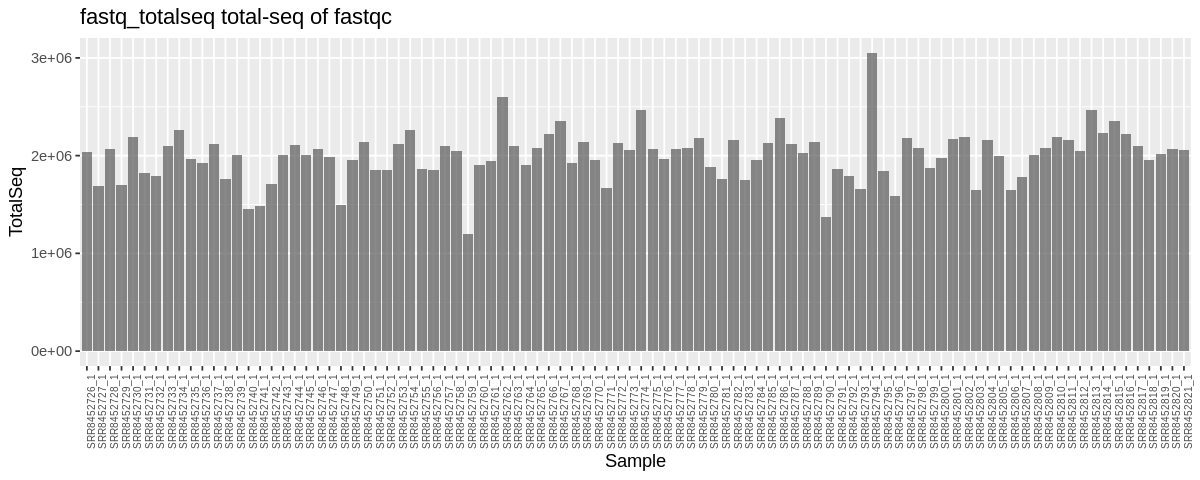

In [17]:
g1 = plot_totalseq(fastqc_SE_001, "fastq_totalseq", outdir)

options(repr.plot.width=10, repr.plot.height=4)
plot_grid (g1)

#### >> Average of %GC of sequenced reads

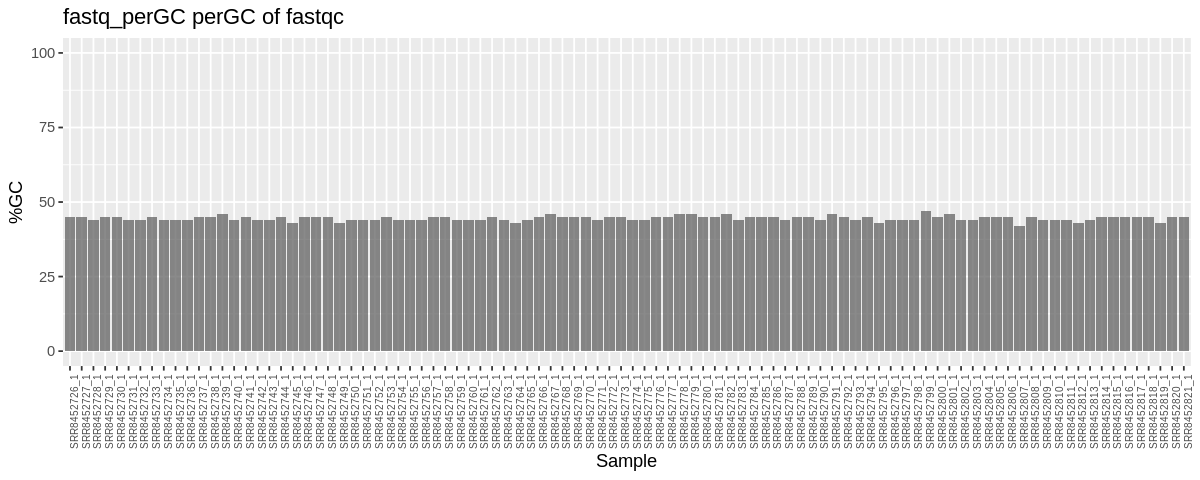

In [18]:
g1 = plot_perGC(fastqc_SE_001, "fastq_perGC", outdir)

options(repr.plot.width=10, repr.plot.height=4)
plot_grid (g1)

### Fig. 2: Read Distribution ('blacklist' samples (cells) are excluded)

#### >> Rate of reads mapped to genome

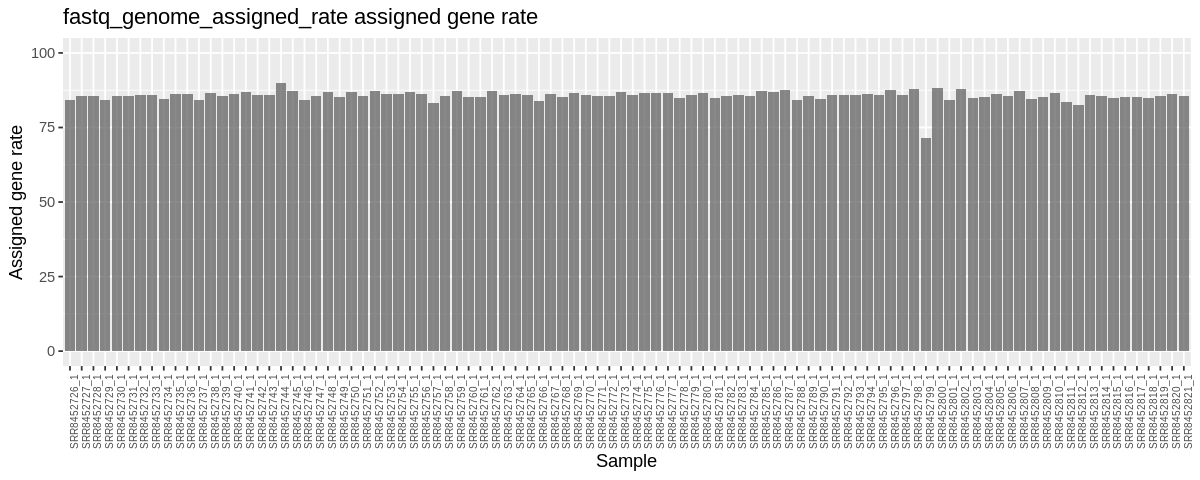

In [19]:
g1 = plot_assignedgene_rate(fastqc_SE_001, readDist_SE_001, "fastq_genome_assigned_rate", outdir, 100, nonplot=exclude_samplename)

options(repr.plot.width=10, repr.plot.height=4)
plot_grid (g1)

####  >> Distribution of mapped reads over genomic features

For RamDA-seq, in addition to the CDS, 5UTR, and 3UTR fractions, intron fractions shows relatively high proportion. This is a feature of total RNA-seq methods.

Using id as id variables


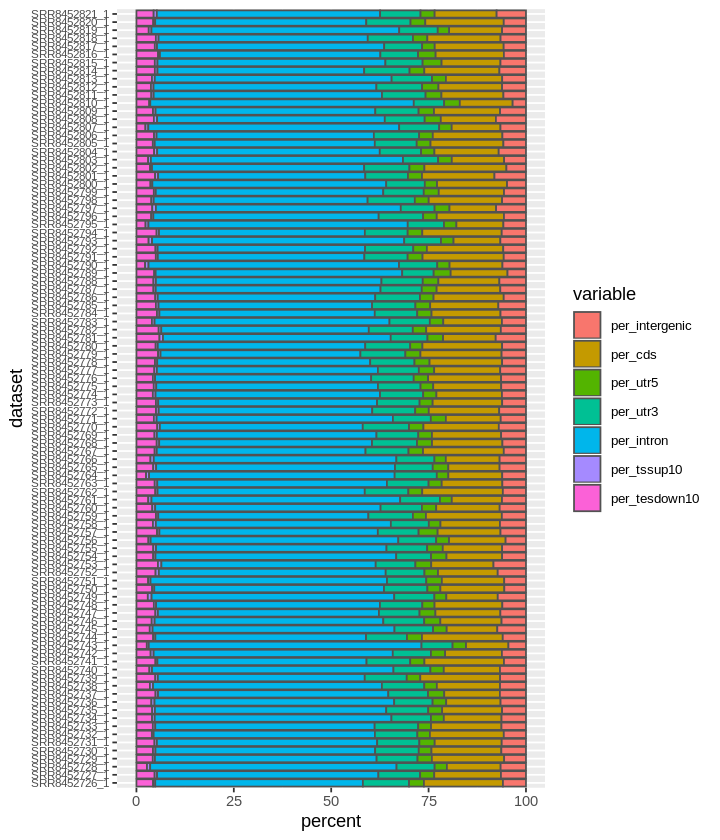

In [20]:
g1 = plot_readDist_summary(readDist_SE_001, "bam_readDistribution", outdir, nonplot=exclude_samplename)

options(repr.plot.width=6, repr.plot.height=7)
plot_grid(g1)

### Fig. 3: Gene body coverage ('blacklist' samples (cells) are excluded)
This figure shows mean read coverage over transcripts.

If the values from 5′ to 3′ are high and constant, it indicates the samples (cells) show full-length transcript coverage.

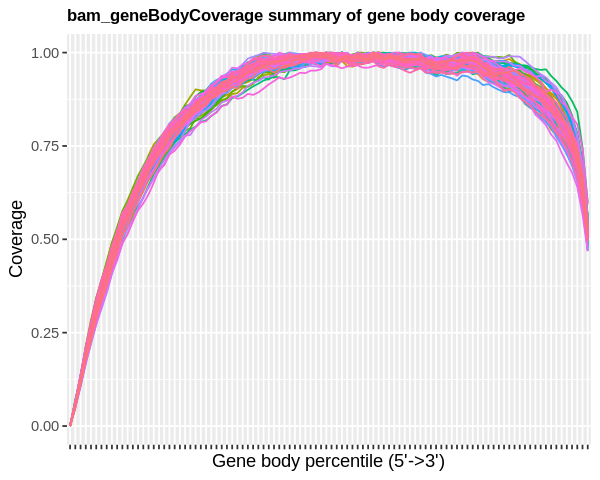

In [21]:
g1 = plot_geneBodyCov_heatmap(geneBC_SE_001, "bam_geneBodyCoverage", "", outdir, nonplot=exclude_samplename)

options(repr.plot.width=5, repr.plot.height=4)
plot_grid(g1)

### Fig. 4: Strandness ('blacklist' samples (cells) are excluded)

This figure shows the proportion of reads classified as 'sense', 'antisense', or 'undetermined' acoording to the gene annotation.

The QC result varies depending on whether the experimental protocol is unstranded or stranded ones.

- If the experimental protocol is unstranded, the proportions of 'sense_fraction' **and** 'antisense_fraction' are similar.
- If the experimental protocol is stranded, the proportions of 'sense_fraction' **or** 'antisense_fraction' are dominant.

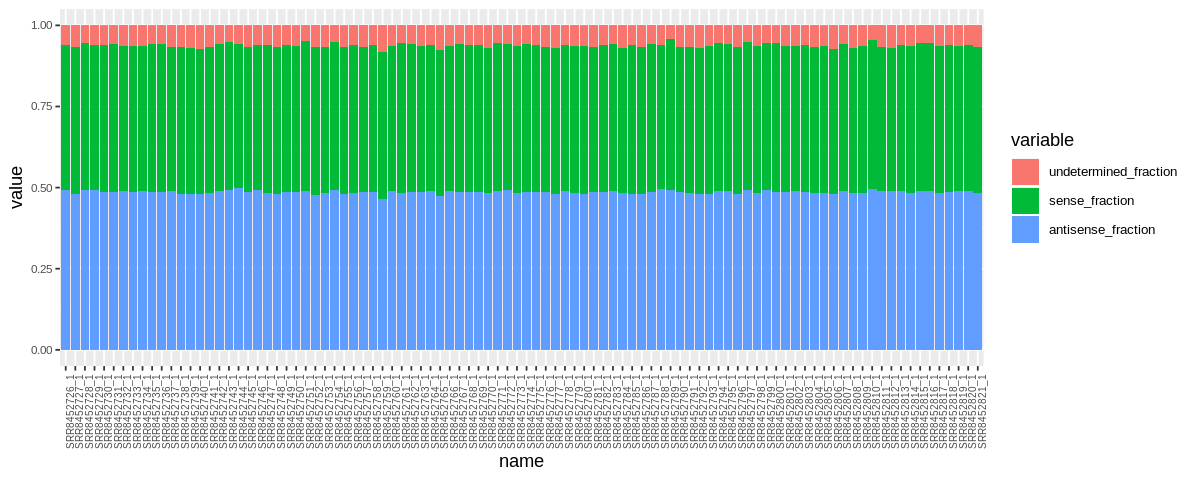

In [22]:
g1 = plot_bar_inferexp(infer_SE_001, "bam_inferexperiment", outdir, nonplot=exclude_samplename)

options(repr.plot.width=10, repr.plot.height=4)
plot_grid (g1)

### Fig. 5: High sensitivity rrna mapping QC ('blacklist' samples (cells) are excluded)
This figure shows the proportion of reads mapped to rRNA genes.


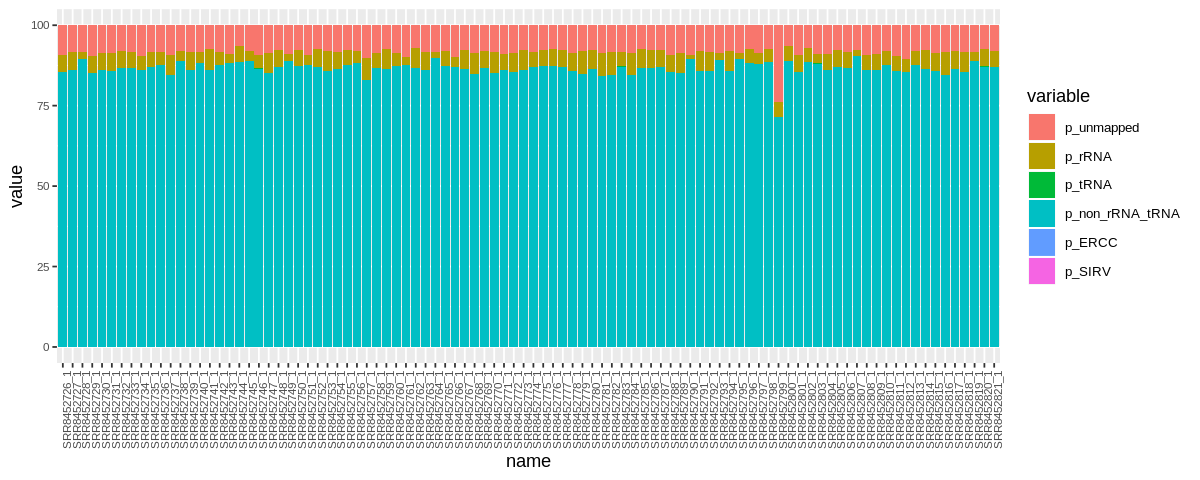

In [23]:
if (file.exists(highsensitivity_rrna_result_path)){
    
    g1 = plot_bar_highsenst_rrna(highsenst_rrna_SE_001, "bam_highsensitivity_rrnaQC", outdir, nonplot=exclude_samplename)

    options(repr.plot.width=10, repr.plot.height=4)
    plot_grid (g1)   
} else {
  cat("highsensitivity rrnaQC results not found.")
}

### Fig. 6: Percentage of reads assigned to genes ('blacklist' samples (cells) are excluded)
The below figures show the percentage of reads assigned to genes based on featureCounts results.

#### >> mRNA (gene level)

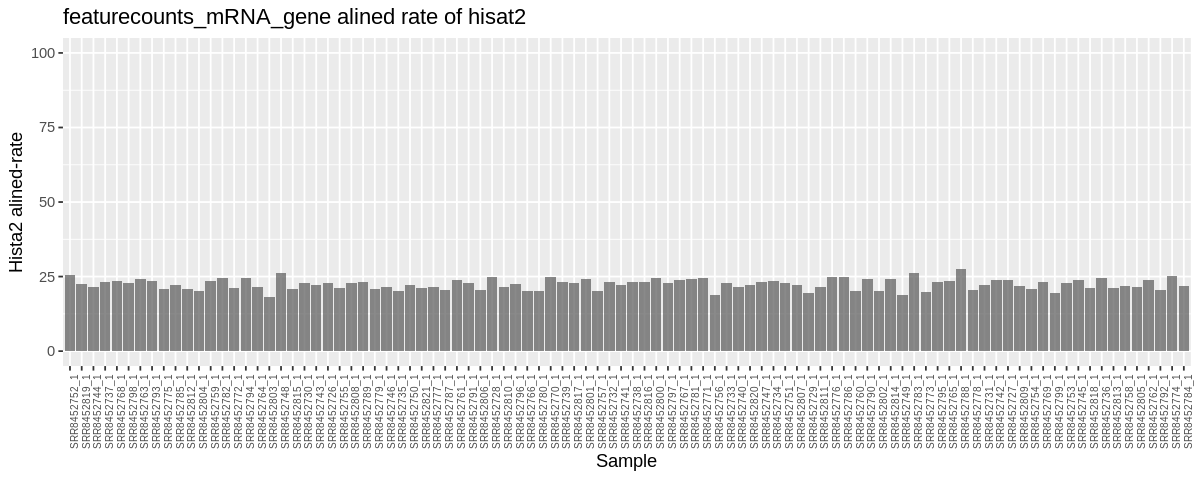

In [24]:
g1 = plot_assigned_rate(fcount_SE_mrna_gene_001, "featurecounts_mRNA_gene", outdir, ylim=100, nonplot=exclude_samplename)

options(repr.plot.width=10, repr.plot.height=4)
plot_grid (g1)

#### >> mRNA (transcript level)

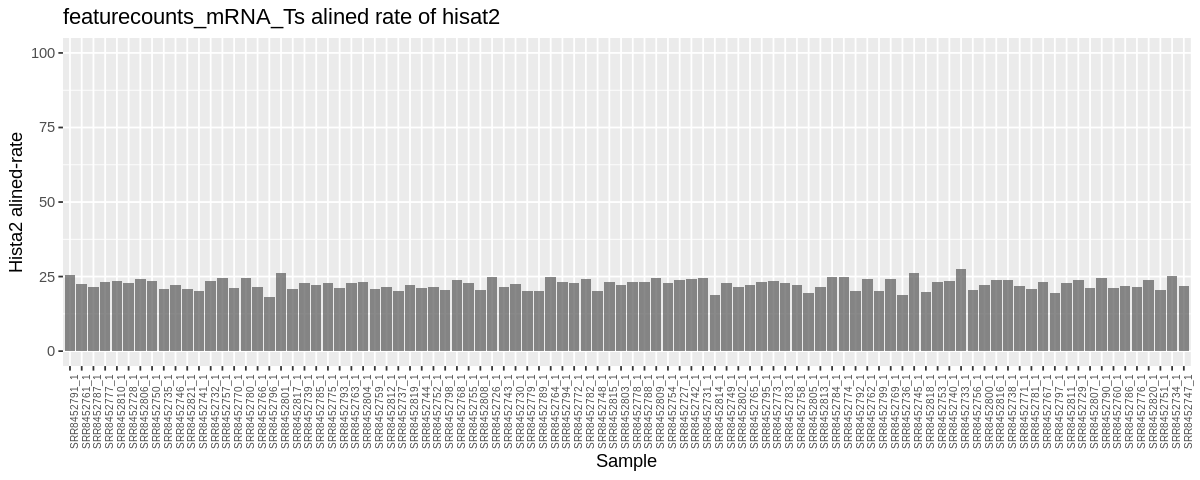

In [25]:
g1 = plot_assigned_rate(fcount_SE_mrna_Ts_001, "featurecounts_mRNA_Ts", outdir, ylim=100, nonplot=exclude_samplename)

options(repr.plot.width=10, repr.plot.height=4)
plot_grid (g1)

#### >> mitocondria (transcript level)

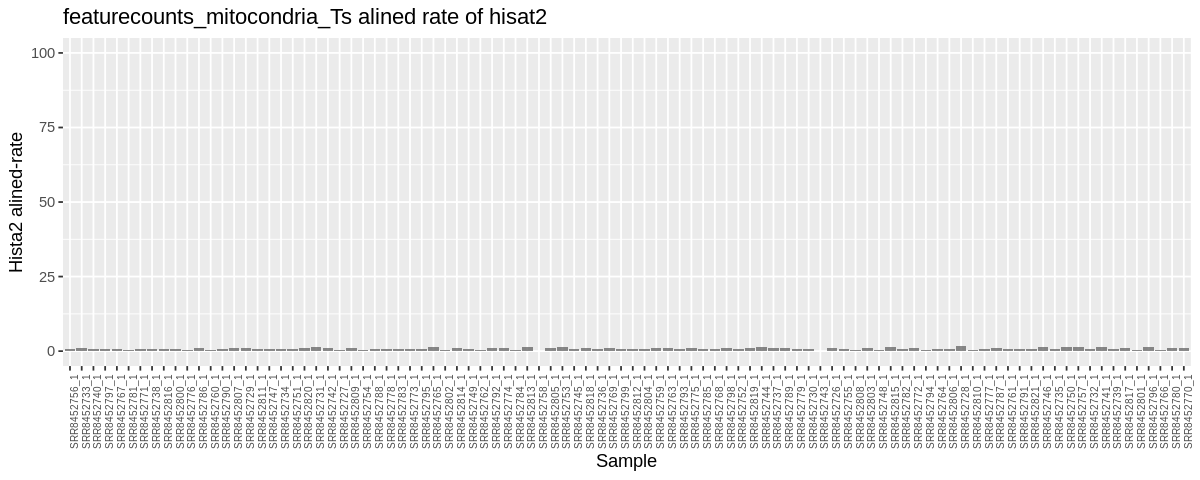

In [26]:
g1 = plot_assigned_rate(fcount_SE_mt_Ts_001, "featurecounts_mitocondria_Ts", outdir, ylim=100, nonplot=exclude_samplename)

options(repr.plot.width=10, repr.plot.height=4)
plot_grid (g1)

#### >> rRNA (transcript level)

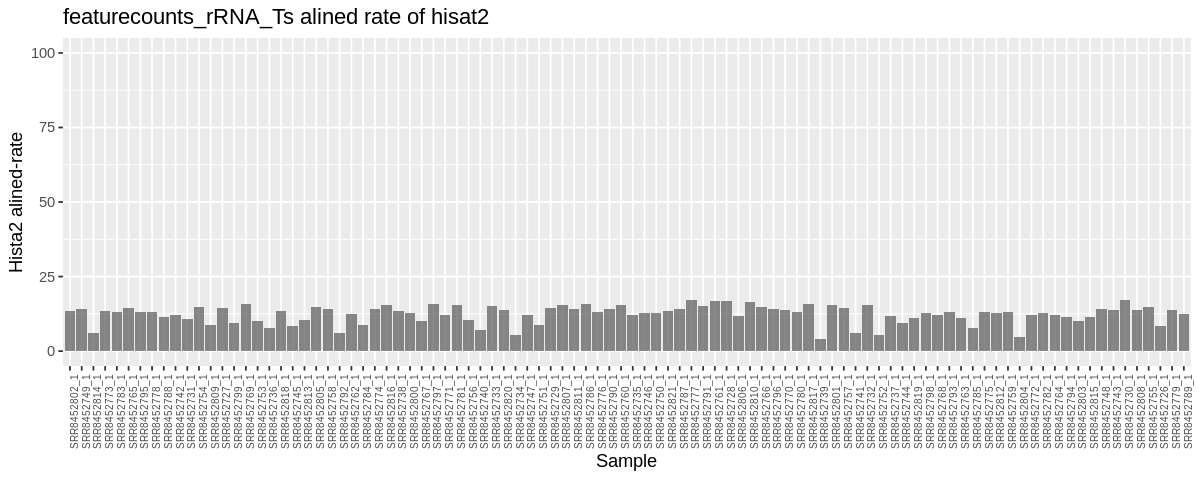

In [27]:
g1 = plot_assigned_rate(fcount_SE_rrna_Ts_001, "featurecounts_rRNA_Ts", outdir, ylim=100, nonplot=exclude_samplename)

options(repr.plot.width=10, repr.plot.height=4)
plot_grid (g1)

## 3. Plots of number of detected genes


#### >> Correlation of expression levels
Some samples (cells) are randomly chosen, and expression levels between cells are plotted.


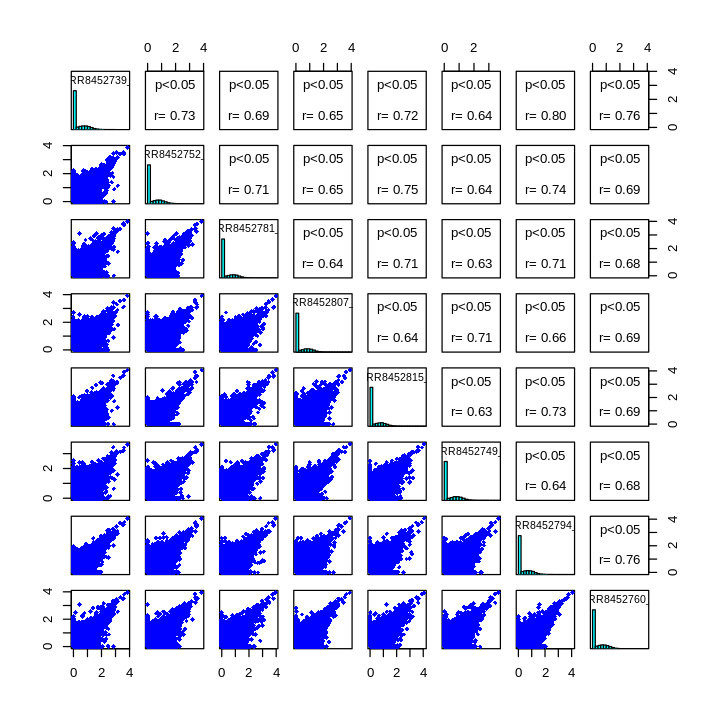

In [28]:
### plot detgenes num
options(repr.plot.width=6, repr.plot.height=6)
bar_detgene_001 = plot_detgene_bar(fcount_SE_merge_001_rpkm_gene, fcount_SE_merge_001_rpkm_gene_log, nonplot=exclude_samplename)

#### >> Number of detected genes

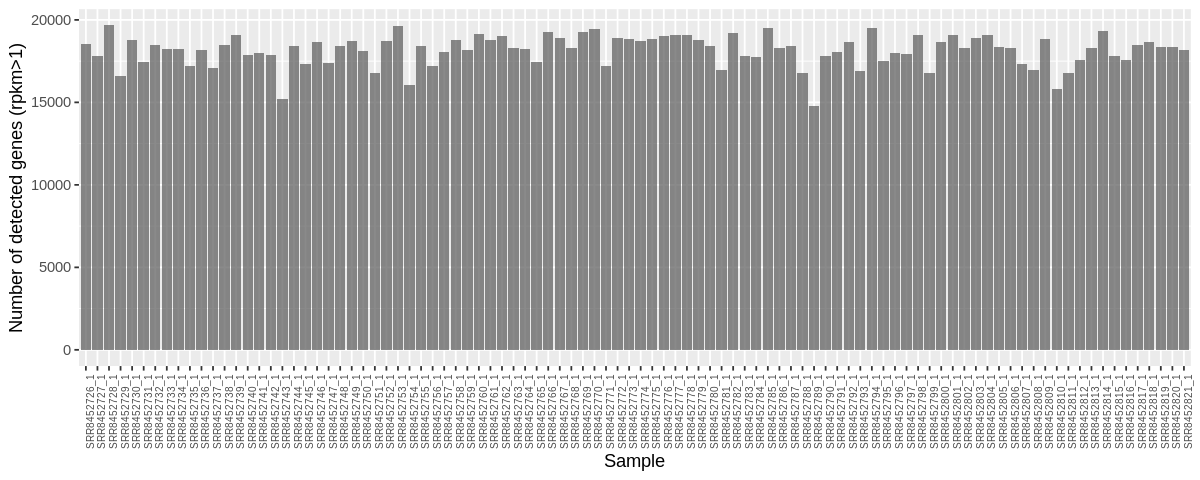

In [29]:
options(repr.plot.width=10, repr.plot.height=4)
plot_grid(bar_detgene_001)

## 4. Plots of dimensionality reduction results
The below figures show the results of PCA, tSNE, umap.

In [30]:
### dimentional reduction
fcount_SE_dimentrd_set = create_pca_tsne_umap(fcount_SE_merge_001_rpkm_gene_log, perplexity=10, local_connectivity=1.0, n_neighbors=15)

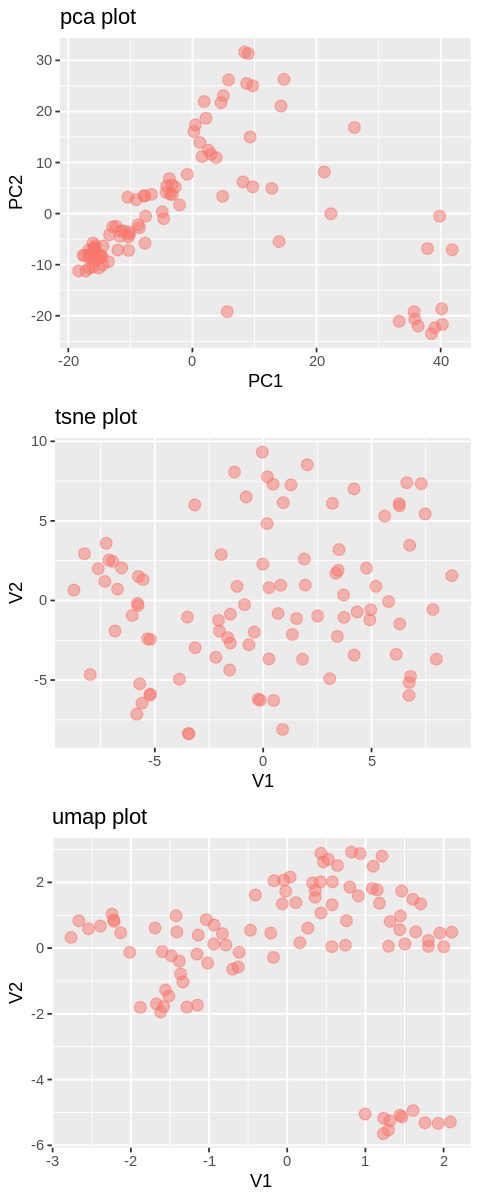

In [31]:
plot_pca = ggplot_2D(fcount_SE_dimentrd_set[["pca_df"]], "PC1", "PC2", "pca plot", "", outdir)
plot_tsne = ggplot_2D(fcount_SE_dimentrd_set[["tsne_df"]], "V1", "V2", "tsne plot", "", outdir)
plot_umap = ggplot_2D(fcount_SE_dimentrd_set[["umap_df"]], "V1", "V2", "umap plot", "", outdir)

options(repr.plot.width=4, repr.plot.height=10)
plot_grid (plot_pca, plot_tsne, plot_umap, nrow = 3)